# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [3]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [24]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
url_base = 'http://prodtec-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2023-02-01T10:00:00Z'
endTime = '2023-03-18T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [17]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

In [18]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
df.set_index('FECHA')
df.sort_index(ascending=True)
display(df.tail(10))

,FECHA,10,11,12,13,14,15,16,17,18,...,58,60,61,62,63,64,65,66,67,68
36,2023-03-09 07:00:00,1.95,0,3.26,1.36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2023-03-10 07:00:00,0,0,0.13,1.5,0.78,4.07,0.53,0.19,0,...,0,0,0,0,0,0,0,0,0,0
38,2023-03-11 07:00:00,0,0,0,0,0,0,0,0,0,...,0,1.6,0,0,0,0,0,0,0,0
39,2023-03-12 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2023-03-13 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2023-03-14 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,2023-03-15 07:00:00,12.01,10.56,9.39,3.85,2.92,4.88,0.44,1.89,1.78,...,1.27,0,0,0,0,0,0,0,0,0
43,2023-03-16 07:00:00,27.24,14.07,7.75,5.58,6.59,21.5,31.97,38.87,37.67,...,18.54,13.86,21.22,35.01,13.85,24,39.83,24.04,27.46,32.54
44,2023-03-17 07:00:00,7.43,6.83,4.69,9.62,0.75,4.74,9.17,8.04,3.7,...,2.4,7.18,10.97,4.31,0,0,0.06,0,0,0
45,2023-03-18 07:00:00,16.94,14.79,28.11,19.73,0.9,13.13,15.58,19.45,16.93,...,17.33,2.78,9.15,0.25,0,0,0.36,0,0,0


In [19]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.tail(10))

FECHA,2023-02-01 07:00:00,2023-02-02 07:00:00,2023-02-03 07:00:00,2023-02-04 07:00:00,2023-02-05 07:00:00,2023-02-06 07:00:00,2023-02-07 07:00:00,2023-02-08 07:00:00,2023-02-09 07:00:00,2023-02-10 07:00:00,...,2023-03-09 07:00:00,2023-03-10 07:00:00,2023-03-11 07:00:00,2023-03-12 07:00:00,2023-03-13 07:00:00,2023-03-14 07:00:00,2023-03-15 07:00:00,2023-03-16 07:00:00,2023-03-17 07:00:00,2023-03-18 07:00:00
58,0.0,1.84,8.47,0.00,0.00,0.0,0.0,0.0,6.07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.27,18.54,2.40,17.33
60,0.0,0.00,5.47,1.52,0.56,0.0,0.0,0.0,3.50,0.0,...,0.0,0.0,1.6,0.0,0.0,0.0,0.00,13.86,7.18,2.78
61,0.0,0.00,0.34,0.72,0.00,0.0,0.0,0.0,4.18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,21.22,10.97,9.15
62,0.0,0.00,0.01,0.93,0.00,0.0,0.0,0.0,0.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,35.01,4.31,0.25
63,0.0,0.00,0.36,1.01,0.00,0.0,0.0,0.0,2.19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,13.85,0.00,0.00
64,0.0,0.00,0.00,0.62,0.00,0.0,0.0,0.0,0.26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,24.00,0.00,0.00
65,0.0,0.00,1.93,1.52,0.00,0.0,0.0,0.0,4.82,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,39.83,0.06,0.36
66,0.0,0.00,0.00,2.35,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,24.04,0.00,0.00
67,0.0,0.00,2.87,1.99,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,27.46,0.00,0.00
68,0.0,0.00,4.75,2.22,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,32.54,0.00,0.00


In [21]:
piv2 = piv.transpose()

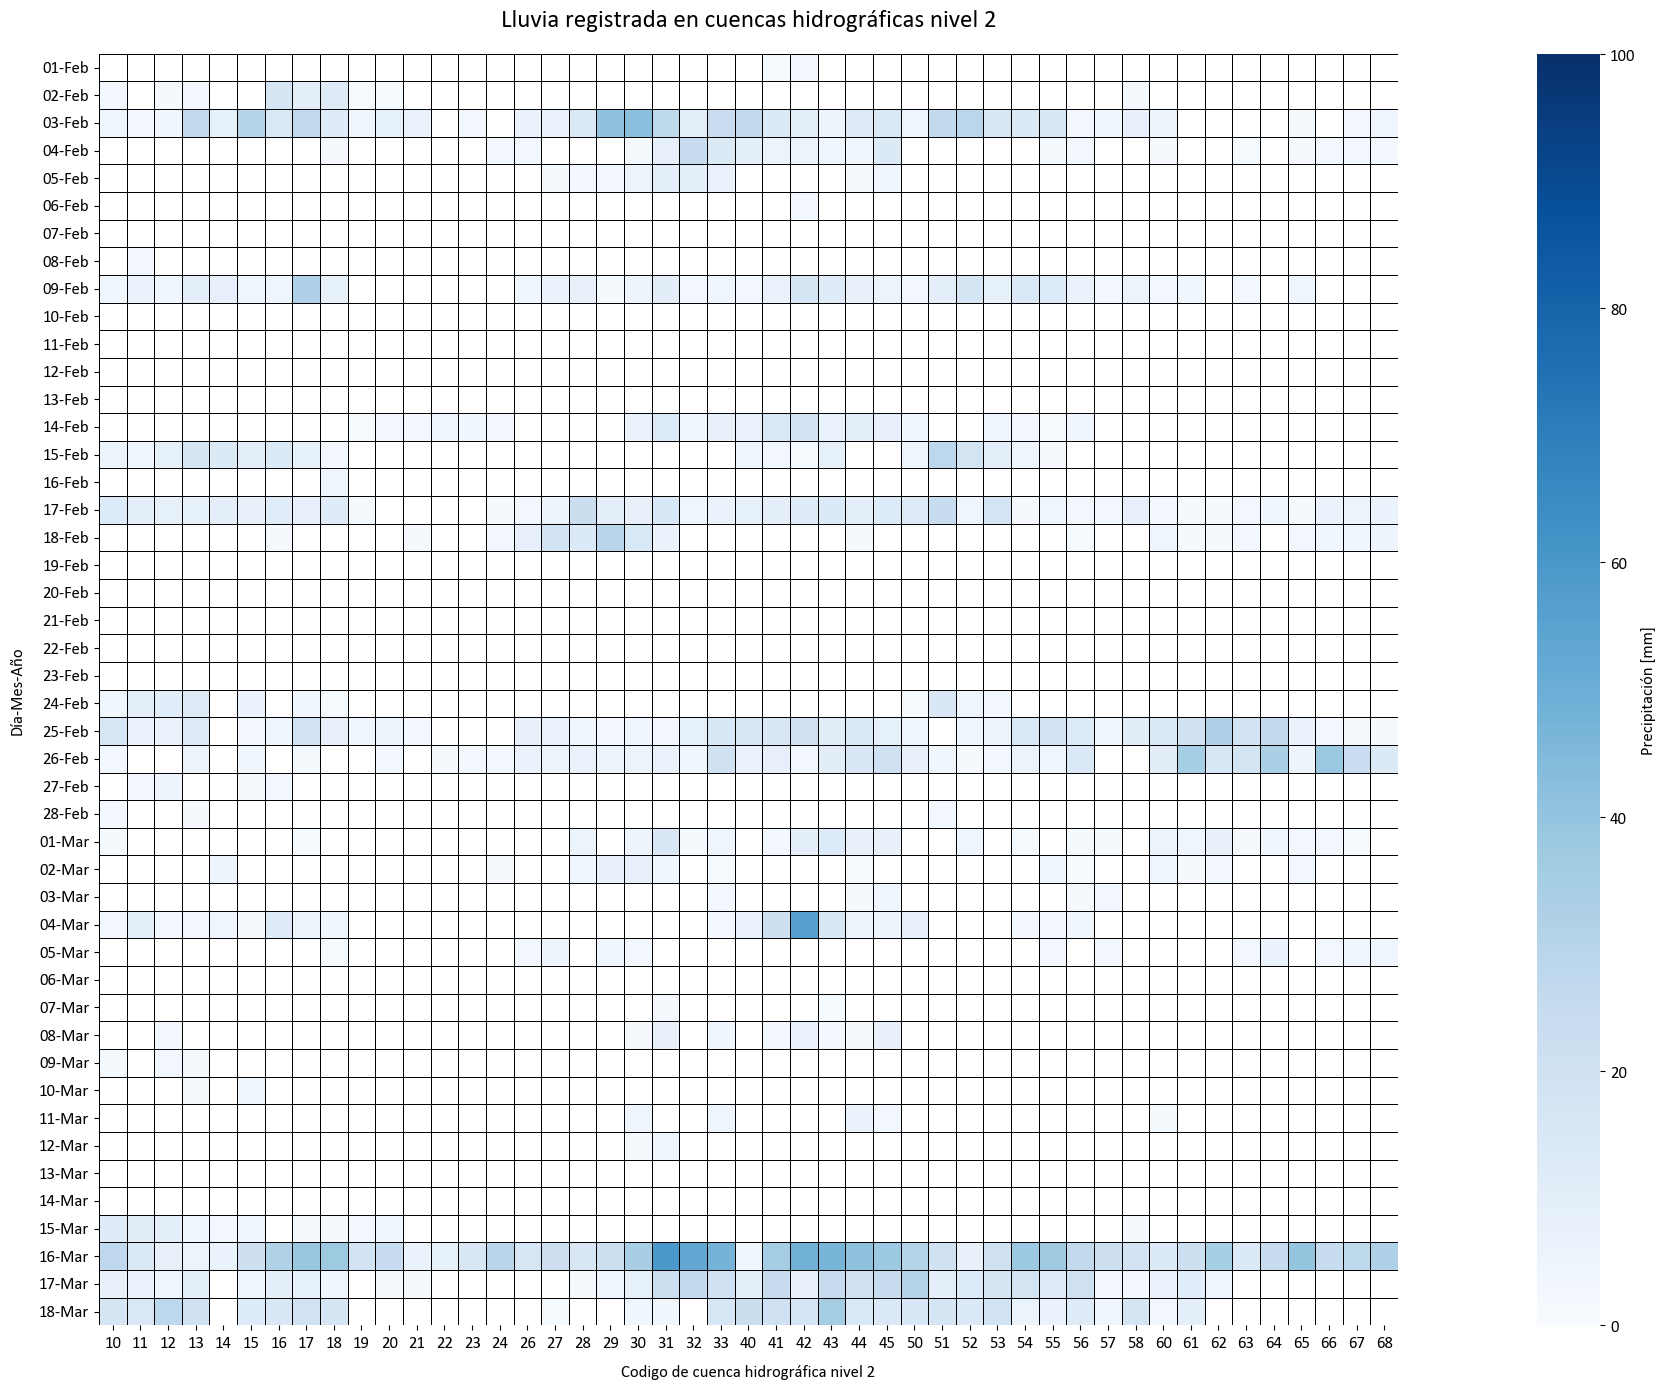

In [22]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

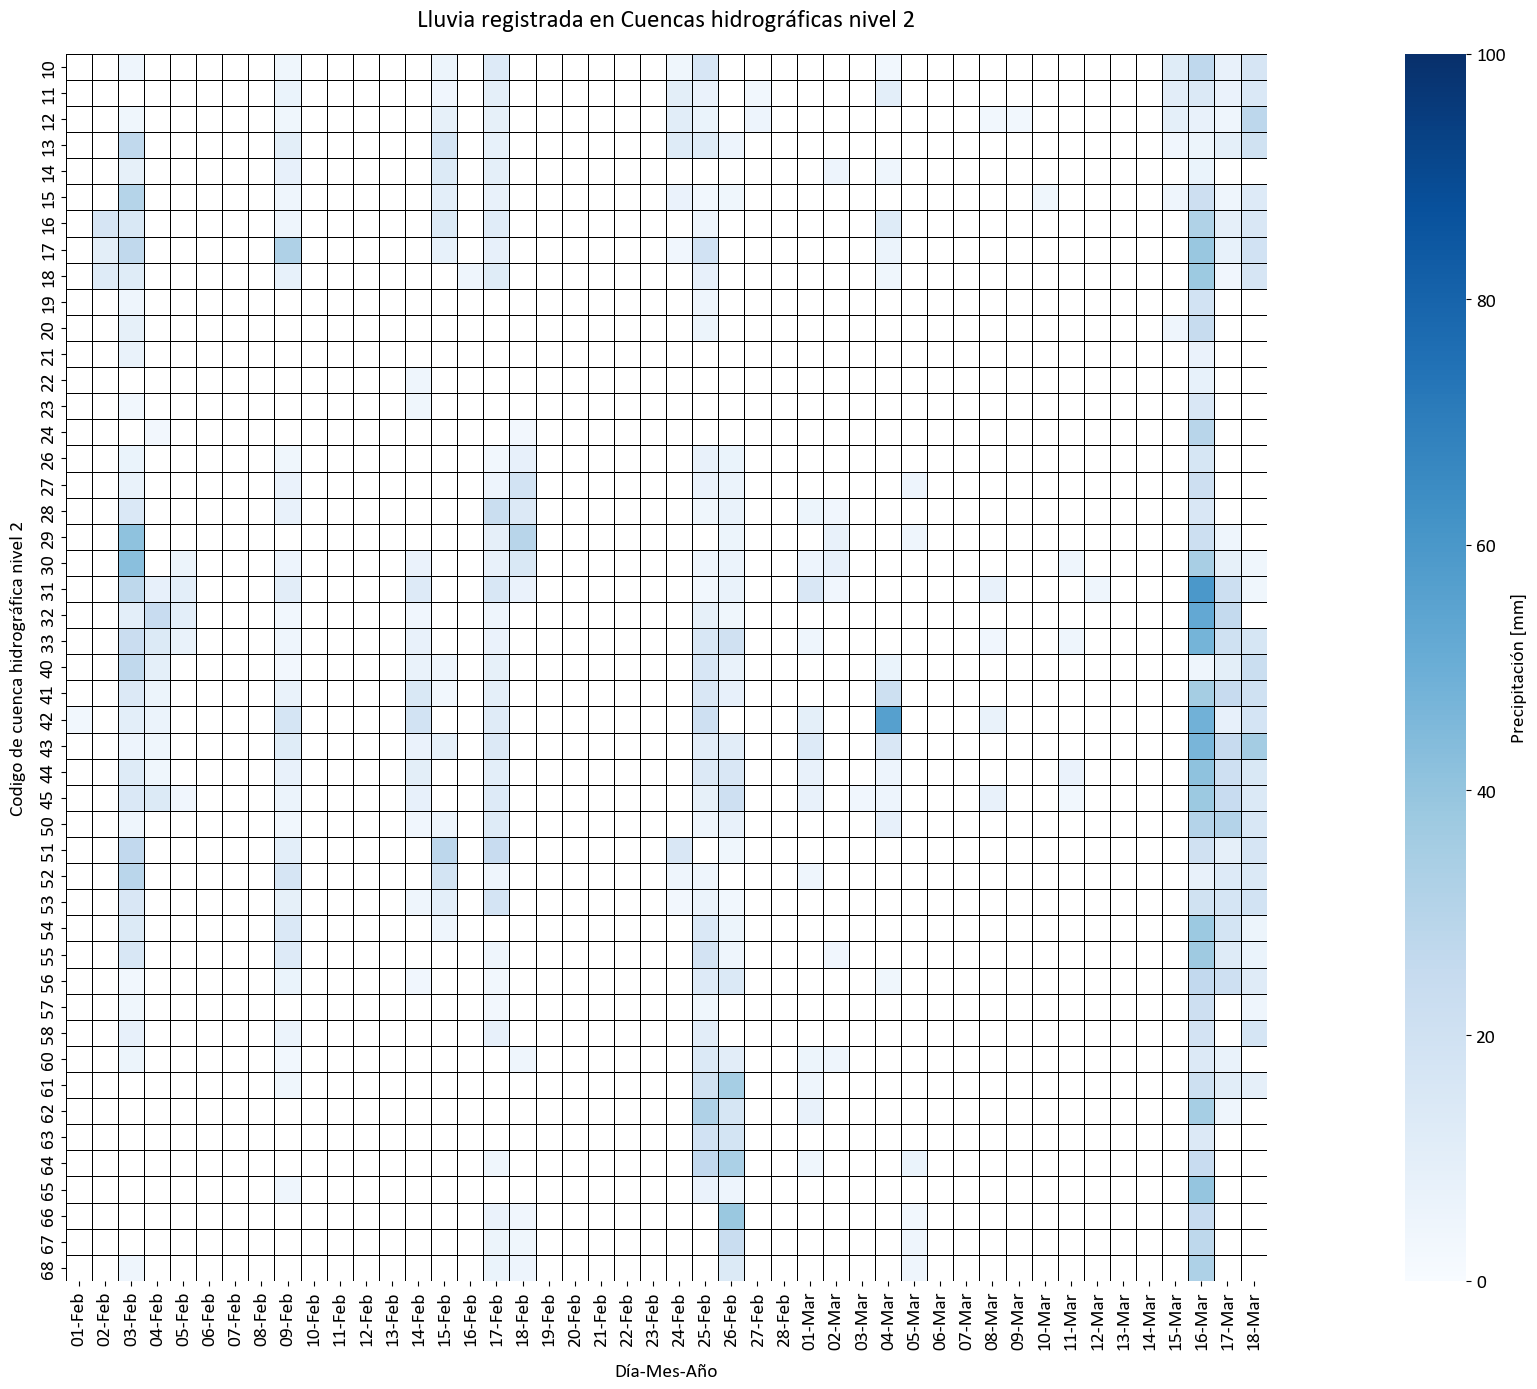

In [23]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = False,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final2.png', dpi=1000, bbox_inches='tight')